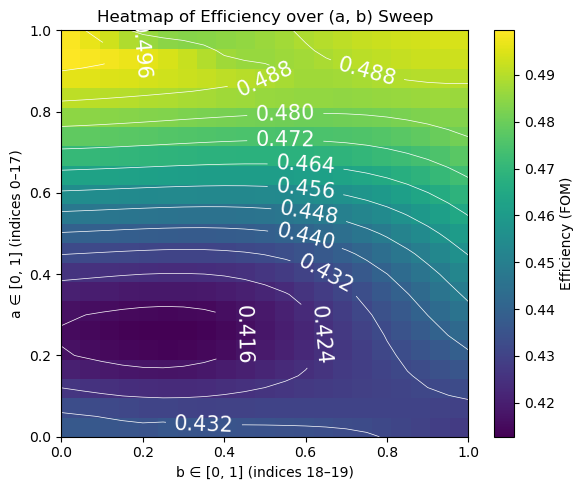

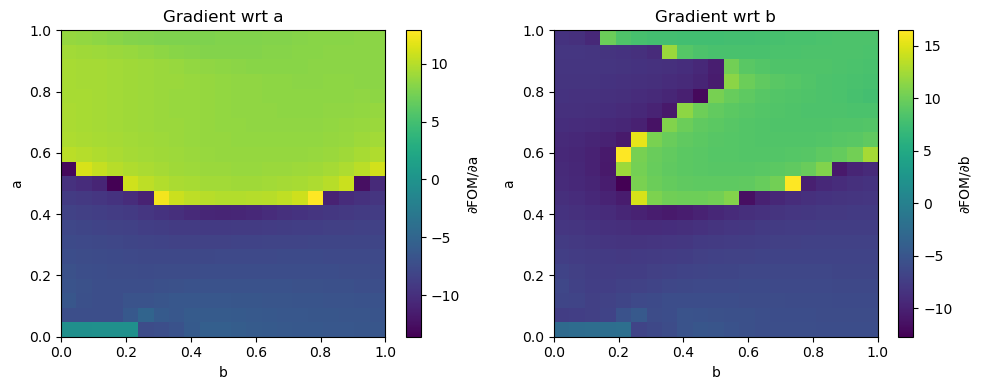

In [5]:
# ─── Jupyter cell: load and plot heatmap ───

import numpy as np
import matplotlib.pyplot as plt

# 1) Load the .npz file
data = np.load("sweep_results.npz")
effs   = data["effs"]    # shape (Na, Nb)
grad_a = data["grad_a"]  # shape (Na, Nb)
grad_b = data["grad_b"]  # shape (Na, Nb)
log_grad_a = np.sign(grad_a) * np.log(np.abs(grad_a))
log_grad_b = np.sign(grad_b) * np.log(np.abs(grad_b))
a_vals = data["a_vals"]  # length Na
b_vals = data["b_vals"]  # length Nb

# 2) Plot a 2D heatmap of efficiency (effs) vs (a,b)
fig, ax = plt.subplots(figsize=(6,5))

# imshow expects (rows, cols) = (len(a_vals), len(b_vals))
im = ax.imshow(
    effs,
    origin='lower',           # so that effs[0,0] sits at bottom-left
    aspect='auto',
    extent=(b_vals.min(), b_vals.max(), a_vals.min(), a_vals.max()),
    cmap='viridis'
)

# 3) Add colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Efficiency (FOM)")

# 4) Label axes
ax.set_xlabel("b ∈ [0, 1] (indices 18–19)")
ax.set_ylabel("a ∈ [0, 1] (indices 0–17)")
ax.set_title("Heatmap of Efficiency over (a, b) Sweep")

# 5) Optional: show some contour lines of efficiency
contours = ax.contour(
    b_vals,
    a_vals,
    effs,
    levels=10,           # e.g. 10 contour levels
    colors='white',
    linewidths=0.5
)
ax.clabel(contours, inline=True, fontsize=15)

plt.tight_layout()
plt.show()

# ─── Optionally, you can also visualize ∂eff/∂a or ∂eff/∂b similarly: ───
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
im1 = ax1.imshow(
    log_grad_a,
    origin='lower',
    aspect='auto',
    extent=(b_vals.min(), b_vals.max(), a_vals.min(), a_vals.max()),
)
ax1.set_title("Gradient wrt a")
ax1.set_xlabel("b")
ax1.set_ylabel("a")
plt.colorbar(im1, ax=ax1, label="∂FOM/∂a")

im2 = ax2.imshow(
    log_grad_b,
    origin='lower',
    aspect='auto',
    extent=(b_vals.min(), b_vals.max(), a_vals.min(), a_vals.max()),
)
ax2.set_title("Gradient wrt b")
ax2.set_xlabel("b")
ax2.set_ylabel("a")
plt.colorbar(im2, ax=ax2, label="∂FOM/∂b")

plt.tight_layout()
plt.show()


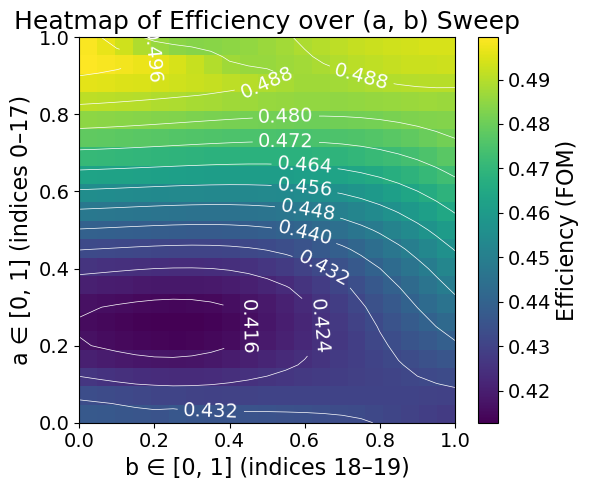

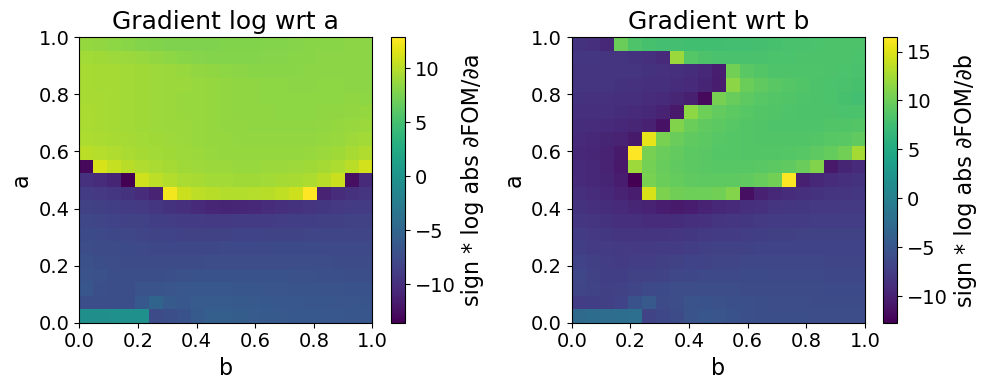

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Load the .npz file
data      = np.load("sweep_results.npz")
effs      = data["effs"]    # shape (Na, Nb)
grad_a    = data["grad_a"]  # shape (Na, Nb)
grad_b    = data["grad_b"]  # shape (Na, Nb)
log_grad_a = np.sign(grad_a) * np.log(np.abs(grad_a))
log_grad_b = np.sign(grad_b) * np.log(np.abs(grad_b))
a_vals    = data["a_vals"]  # length Na
b_vals    = data["b_vals"]  # length Nb

# 2) Plot a 2D heatmap of efficiency (effs) vs (a,b)
fig, ax = plt.subplots(figsize=(6,5))

im = ax.imshow(
    effs,
    origin='lower',
    aspect='auto',
    extent=(b_vals.min(), b_vals.max(), a_vals.min(), a_vals.max()),
    cmap='viridis'
)

# 3) Add colorbar (and bump up its label & tick size)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Efficiency (FOM)", fontsize=16)
cbar.ax.tick_params(labelsize=14)

# 4) Label axes & title with larger font
ax.set_xlabel("b ∈ [0, 1] (indices 18–19)", fontsize=16)
ax.set_ylabel("a ∈ [0, 1] (indices 0–17)", fontsize=16)
ax.set_title("Heatmap of Efficiency over (a, b) Sweep", fontsize=18)

# 5) Increase the tick‐label size on the heatmap axes
ax.tick_params(axis='both', which='major', labelsize=14)

# 6) Optional: draw contour lines (bump up contour label size too)
contours = ax.contour(
    b_vals,
    a_vals,
    effs,
    levels=10,
    colors='white',
    linewidths=0.5
)
ax.clabel(contours, inline=True, fontsize=14)

plt.tight_layout()
plt.show()


# ─── Optionally, visualize ∂eff/∂a and ∂eff/∂b with bigger labels ───────────
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

im1 = ax1.imshow(
    log_grad_a,
    origin='lower',
    aspect='auto',
    extent=(b_vals.min(), b_vals.max(), a_vals.min(), a_vals.max()),
    cmap='viridis'
)
ax1.set_title("Gradient log wrt a", fontsize=18)
ax1.set_xlabel("b", fontsize=16)
ax1.set_ylabel("a", fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)
cbar1 = plt.colorbar(im1, ax=ax1, label="∂FOM/∂a")
cbar1.set_label("sign * log abs ∂FOM/∂a", fontsize=16)
cbar1.ax.tick_params(labelsize=14)

im2 = ax2.imshow(
    log_grad_b,
    origin='lower',
    aspect='auto',
    extent=(b_vals.min(), b_vals.max(), a_vals.min(), a_vals.max()),
    cmap='viridis'
)
ax2.set_title("Gradient wrt b", fontsize=18)
ax2.set_xlabel("b", fontsize=16)
ax2.set_ylabel("a", fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)
cbar2 = plt.colorbar(im2, ax=ax2, label="∂FOM/∂b")
cbar2.set_label("sign * log abs ∂FOM/∂b", fontsize=16)
cbar2.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()
